In [27]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url_teams = 'https://www.sports-reference.com/cbb/schools/#all_NCAAM_schools'
r_teams = requests.get(url_teams)
print(r_teams.status_code)

200


In [4]:
soup_teams = BeautifulSoup(r_teams.text)
table = soup_teams.find('table', id="NCAAM_schools")

In [5]:
header_row = table.find('thead').find_all('tr')[0]
headers = []
for title in header_row.find_all('th'):
    headers.append(title['data-stat'])
headers = headers[1:]

In [6]:
table = soup_teams.find_all('table')[0]

rows = table.find('tbody').find_all('tr')

In [7]:
table_data = []
for row in rows:
    cells = row.find_all('td')
    row_data = []
    
    for cell in cells:
        row_data.append(cell.text.strip())
    table_data.append(row_data)
df_teams = pd.DataFrame(table_data, columns=headers)

In [8]:
df_teams = df_teams.dropna()
df_teams = df_teams.reset_index(drop=True)

In [9]:
df_teams['year_max'] = df_teams['year_max'].astype(int)
df_teams['year_min'] = df_teams['year_min'].astype(int)
active_teams = df_teams[(df_teams['year_max'] == 2025) & (df_teams['year_min'] < 2025)]
active_teams = active_teams.reset_index(drop = True)

In [10]:
stats_url = 'https://www.sports-reference.com/cbb/seasons/men/2024-school-stats.html'
r_stats = requests.get(stats_url)
print(r_stats.status_code)

200


In [11]:
soup_stats = BeautifulSoup(r_stats.text)
table = soup_stats.find_all('table')[0]

In [12]:
header_row = table.find('thead').find_all('tr')[1]
headers = []
for title in header_row.find_all('th'):
    headers.append(title['data-stat'])
headers = headers[1:]

In [13]:
rows = table.find('tbody').find_all('tr')
table_data = []
for row in rows:
    cells = row.find_all('td')
    row_data = []
    
    for cell in cells:
        row_data.append(cell.text.strip())
    table_data.append(row_data)
df_stats = pd.DataFrame(table_data, columns=headers)

In [14]:
df_stats = df_stats.dropna()
df_stats = df_stats.reset_index(drop=True)

In [15]:
df_stats['school_name'] = df_stats['school_name'].str.replace(r"\s*NCAA\s*", "", regex=True)
df_stats.loc[340, 'school_name'] = 'Virginia Military Institute'
df_stats.loc[281, 'school_name'] = 'Southern Illinois-Edwardsville'

In [16]:
complete_df = pd.merge(active_teams, df_stats, on="school_name")
complete_df.columns

Index(['school_name', 'location', 'year_min', 'year_max', 'years', 'g_x',
       'wins_x', 'losses_x', 'win_loss_pct_x', 'srs_x', 'sos_x', 'poll_final',
       'conf_champ_count', 'conf_champ_post_count', 'ncaa_count',
       'ncaa_final_four_count', 'ncaa_champ_count', 'g_y', 'wins_y',
       'losses_y', 'win_loss_pct_y', 'srs_y', 'sos_y', 'DUMMY', 'wins_conf',
       'losses_conf', 'DUMMY', 'wins_home', 'losses_home', 'DUMMY',
       'wins_visitor', 'losses_visitor', 'DUMMY', 'pts', 'opp_pts', 'DUMMY',
       'mp', 'fg', 'fga', 'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'ft', 'fta',
       'ft_pct', 'orb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf'],
      dtype='object')

In [66]:
complete_df = complete_df.loc[:, ~complete_df.columns.str.contains('DUMMY')]
complete_df.columns
complete_df

,School,Years,AllTimeGames,AllTimeWins,AllTimeLosses,AllTimeWinPct,AllTimeSRS,AllTimeSOS,FinalPoll,RegSeasonConfChampCount,ConfChampPostCount,NCAAAppCount,NCAAFinalFourCount,NCAAChampCount,Games2023,Wins2023,Losses2023,WinPct2023,SRS2023,SOS2023,ConfWins2023,ConfLosses2023,HomeWins2023,HomeLosses2023,AwayWins2023,AwayLosses2023,Points2023,OppPoints2023,MinutesPlayed2023,FGM2023,FGA2023,FGPct2023,3PM2023,3PA2023,3PPct2023,FTM2023,FTA2023,FTPct2023,OffReb2023,TotReb2023,Assists2023,Steals2023,Blocks2023,Turnovers2023,Fouls2023
0,Abilene Christian,15,426,228,198,0.535,-7.22,-3.66,0,0,2,2,0,0,34,16,18,0.471,-4.12,-1.12,10.0,10.0,8,6,5,10,2452,2500,1375,861,1987,0.433,180,530,0.340,550,757,0.727,329,1139,431,262,72,434,665
1,Air Force,68,1846,794,1052,0.430,-3.11,1.06,0,1,0,4,0,0,31,9,22,0.290,-4.77,1.43,2.0,16.0,4,12,5,8,2051,2243,1250,727,1604,0.453,273,757,0.361,324,475,0.682,225,872,451,202,122,372,541
2,Akron,74,1721,1028,693,0.597,-0.15,-1.41,0,9,6,6,0,0,35,24,11,0.686,2.77,-2.08,13.0,5.0,13,1,7,6,2577,2316,1405,915,2018,0.453,280,863,0.324,467,642,0.727,363,1278,455,197,100,394,583
3,Alabama,112,2899,1797,1101,0.620,7.97,4.67,18,10,9,25,1,0,37,25,12,0.676,20.69,11.80,13.0,5.0,14,2,5,5,3335,3006,1490,1136,2385,0.476,413,1108,0.373,650,842,0.772,472,1467,587,256,162,438,734
4,Alabama A&M,26,725,279,446,0.385,-16.61,-11.07,0,1,1,1,0,0,35,12,23,0.343,-14.35,-7.52,9.0,9.0,7,5,4,15,2414,2653,1405,806,1918,0.420,148,516,0.287,654,906,0.722,394,1248,369,261,136,565,727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Wright State,38,1131,633,498,0.560,-1.32,-2.15,0,4,4,4,0,0,32,18,14,0.563,-0.22,-3.62,13.0,7.0,9,7,7,6,2767,2599,1295,1033,1948,0.530,218,569,0.383,483,638,0.757,290,1111,529,200,90,379,499
357,Wyoming,120,2881,1612,1269,0.560,2.77,2.59,4,21,3,16,1,1,32,15,17,0.469,0.54,4.57,8.0,10.0,9,5,3,10,2331,2383,1290,791,1755,0.451,241,648,0.372,508,686,0.741,307,1103,374,165,80,408,500
358,Xavier,104,2700,1614,1086,0.598,6.35,4.04,13,18,9,29,0,0,34,16,18,0.471,12.23,11.03,9.0,11.0,11,7,3,9,2579,2538,1360,923,2116,0.436,232,678,0.342,501,672,0.746,401,1297,551,236,115,396,572
359,Yale,129,3088,1567,1519,0.508,-5.75,-4.25,1,16,3,7,0,0,33,23,10,0.697,4.63,0.41,11.0,3.0,9,2,9,6,2465,2226,1340,919,1969,0.467,241,687,0.351,386,546,0.707,326,1205,495,204,105,316,499


In [ ]:
rename_dict = {
    'school_name': 'School',
    'location': 'Location',
    'year_min': 'YearMin',
    'year_max': 'YearMax',
    'years': 'Years',
    'g_x': 'AllTimeGames',
    'wins_x': 'AllTimeWins',
    'losses_x': 'AllTimeLosses',
    'win_loss_pct_x': 'AllTimeWinPct',
    'srs_x': 'AllTimeSRS',
    'sos_x': 'AllTimeSOS',
    'poll_final': 'FinalPoll',
    'conf_champ_count': 'RegSeasonConfChampCount',
    'conf_champ_post_count': 'ConfChampPostCount',
    'ncaa_count': 'NCAAAppCount',
    'ncaa_final_four_count': 'NCAAFinalFourCount',
    'ncaa_champ_count': 'NCAAChampCount',
    'g_y': 'Games2023',
    'wins_y': 'Wins2023',
    'losses_y': 'Losses2023',
    'win_loss_pct_y': 'WinPct2023',
    'srs_y': 'SRS2023',
    'sos_y': 'SOS2023',
    'wins_conf': 'ConfWins2023',
    'losses_conf': 'ConfLosses2023',
    'wins_home': 'HomeWins2023',
    'losses_home': 'HomeLosses2023',
    'wins_visitor': 'AwayWins2023',
    'losses_visitor': 'AwayLosses2023',
    'pts': 'Points2023',
    'opp_pts': 'OppPoints2023',
    'mp': 'MinutesPlayed2023',
    'fg': 'FGM2023',
    'fga': 'FGA2023',
    'fg_pct': 'FGPct2023',
    'fg3': '3PM2023',
    'fg3a': '3PA2023',
    'fg3_pct': '3PPct2023',
    'ft': 'FTM2023',
    'fta': 'FTA2023',
    'ft_pct': 'FTPct2023',
    'orb': 'OffReb2023',
    'trb': 'TotReb2023',
    'ast': 'Assists2023',
    'stl': 'Steals2023',
    'blk': 'Blocks2023',
    'tov': 'Turnovers2023',
    'pf': 'Fouls2023'
}

complete_df = complete_df.rename(columns=rename_dict)
complete_df = complete_df.drop(columns=['Location', 'YearMin', 'YearMax'])

for col in complete_df.columns:
    if col != 'School':
        complete_df[col] = pd.to_numeric(complete_df[col])


In [ ]:
mean_values = complete_df.mean(numeric_only=True)

mean_df = mean_values.to_frame(name="Mean").T
mean_df


,Years,AllTimeGames,AllTimeWins,AllTimeLosses,AllTimeWinPct,AllTimeSRS,AllTimeSOS,FinalPoll,RegSeasonConfChampCount,ConfChampPostCount,NCAAAppCount,NCAAFinalFourCount,NCAAChampCount,Games2023,Wins2023,Losses2023,WinPct2023,SRS2023,SOS2023,ConfWins2023,ConfLosses2023,HomeWins2023,HomeLosses2023,AwayWins2023,AwayLosses2023,Points2023,OppPoints2023,MinutesPlayed2023,FGM2023,FGA2023,FGPct2023,3PM2023,3PA2023,3PPct2023,FTM2023,FTA2023,FTPct2023,OffReb2023,TotReb2023,Assists2023,Steals2023,Blocks2023,Turnovers2023,Fouls2023
Mean,71.844875,1862.415512,998.537396,863.781163,0.515413,-2.307036,-1.202271,4.440443,8.085873,4.00554,9.941828,0.930748,0.232687,33.063712,17.243767,15.819945,0.515729,-0.558006,-0.277008,9.036111,9.019444,10.376731,4.844875,4.842105,8.961219,2433.952909,2379.958449,1333.6759,865.279778,1941.257618,0.445152,246.825485,725.33795,0.338787,456.551247,635.562327,0.717695,341.166205,1173.714681,442.105263,219.121884,113.66482,389.939058,557.811634


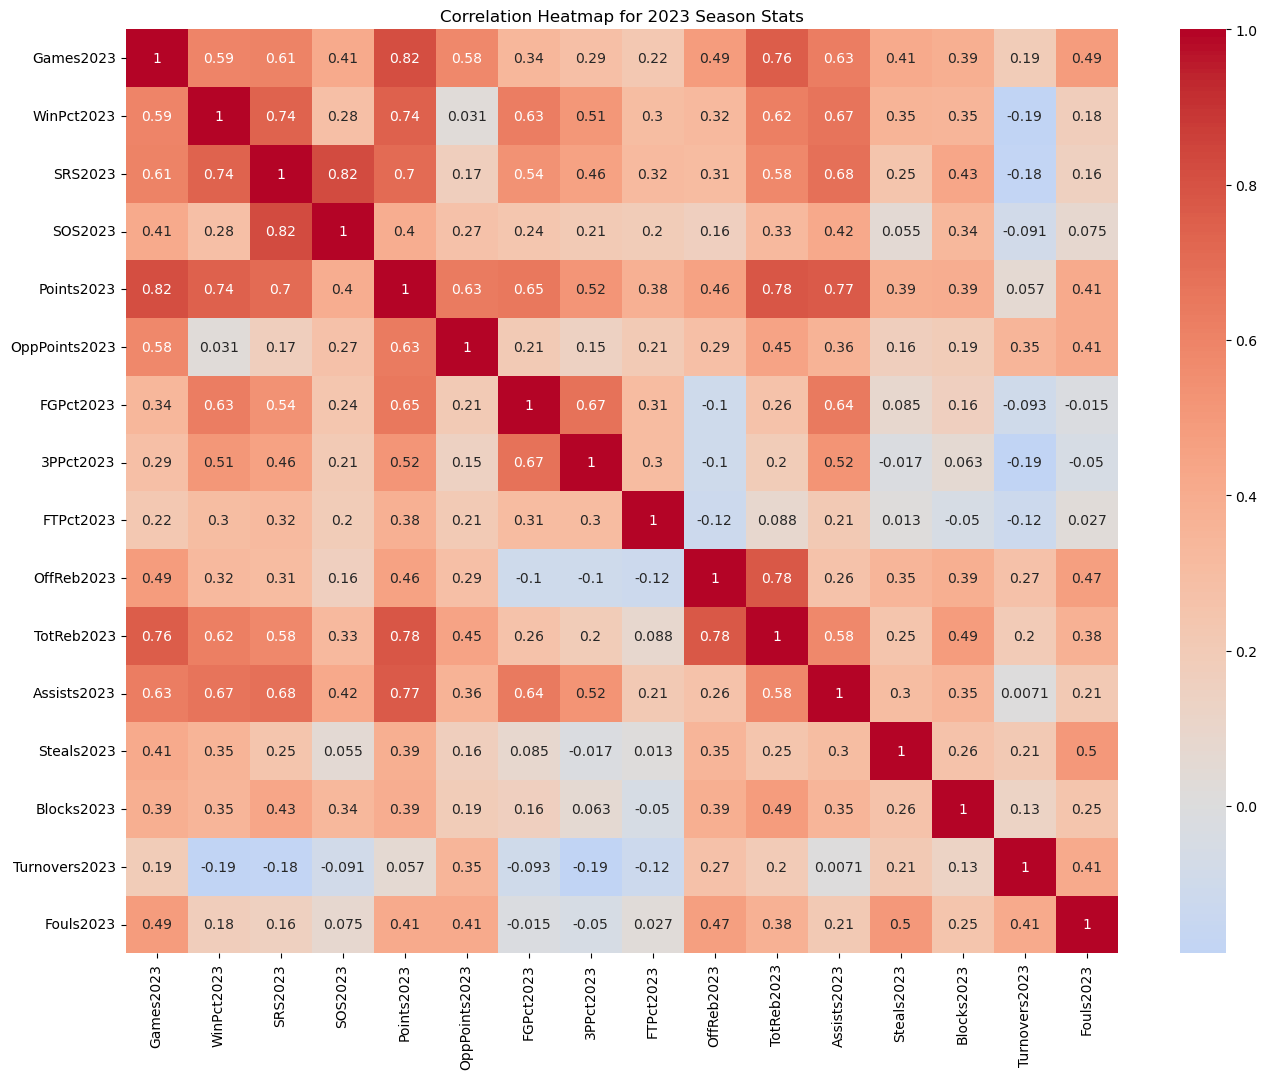

In [59]:
columns_2023 = [
    'Games2023', 'WinPct2023','SRS2023', 'SOS2023', 'Points2023', 'OppPoints2023',
    'FGPct2023','3PPct2023', 'FTPct2023', 'OffReb2023','TotReb2023', 'Assists2023',
    'Steals2023', 'Blocks2023', 'Turnovers2023', 'Fouls2023'
]

season_df_2023 = complete_df[columns_2023]

correlation_matrix = season_df_2023.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap for 2023 Season Stats")
plt.show()

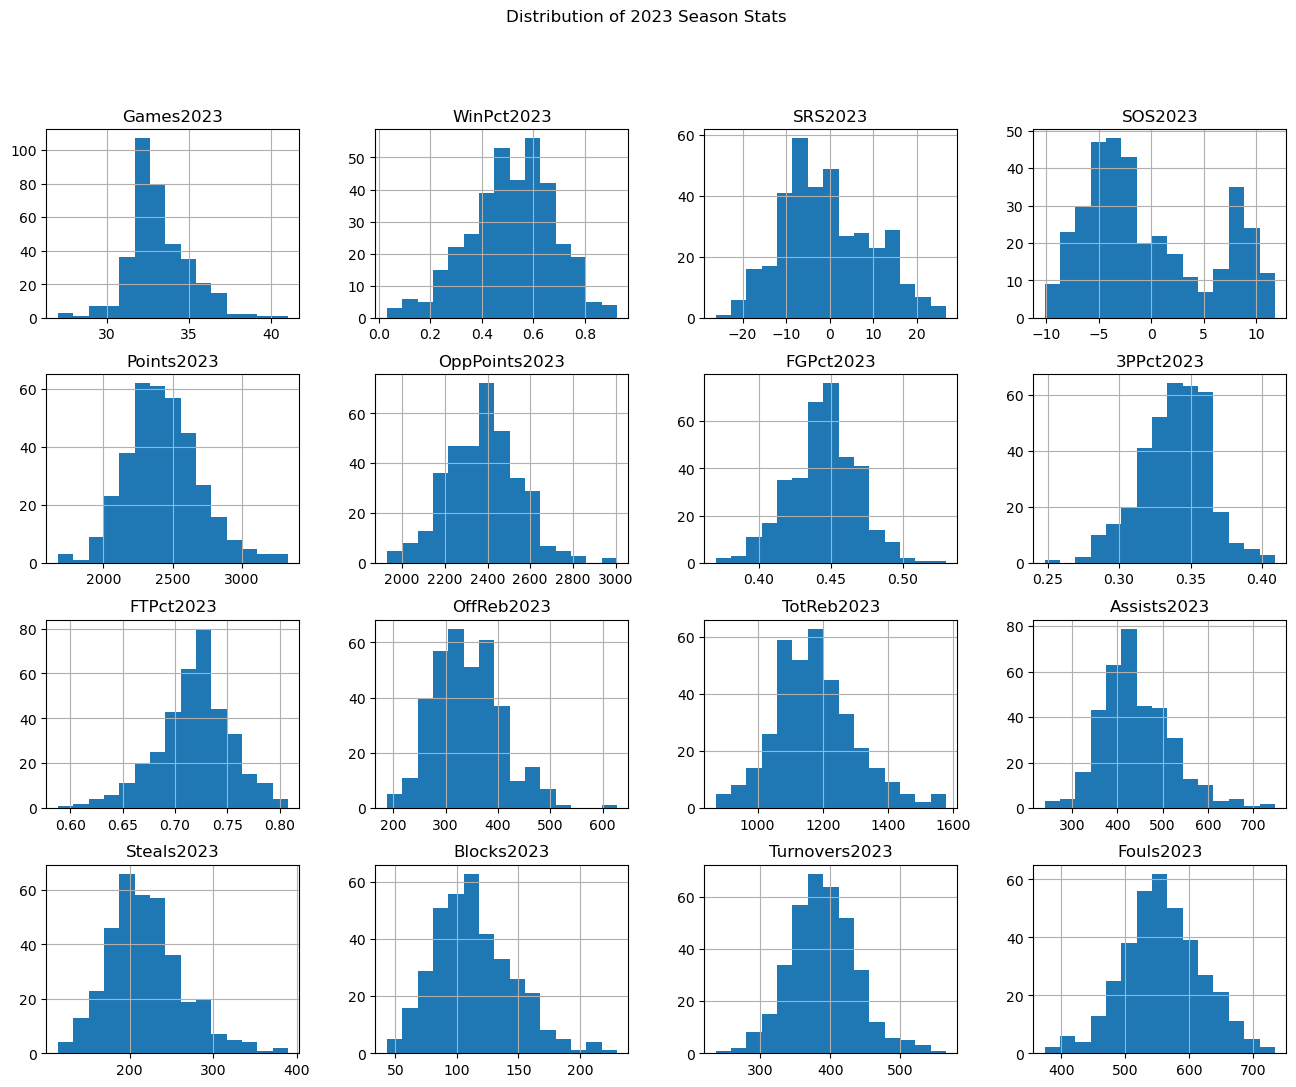

In [60]:
season_df_2023.hist(figsize=(16, 12), bins=15)
plt.suptitle("Distribution of 2023 Season Stats")
plt.show()


In [75]:
chip_teams = complete_df[complete_df['NCAAChampCount'] > 1]
chip_avg_win_pct = chip_teams['WinPct2023'].mean()
season_avg_win_pct = complete_df['WinPct2023'].mean()

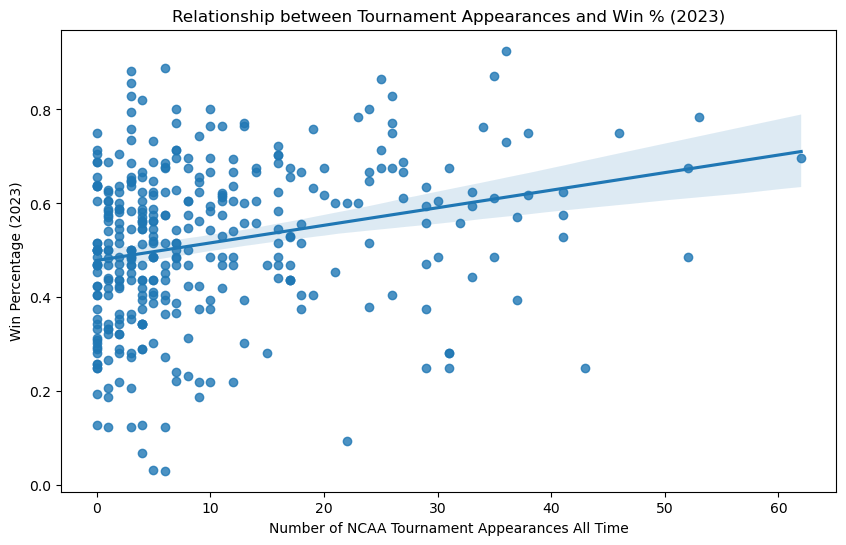

In [84]:
plt.figure(figsize=(10, 6))
sns.regplot(data=complete_df, x='NCAAAppCount', y='WinPct2023')

plt.xlabel("Number of NCAA Tournament Appearances All Time")
plt.ylabel("Win Percentage (2023)")
plt.title("Relationship between Tournament Appearances and Win % (2023)")

plt.show()

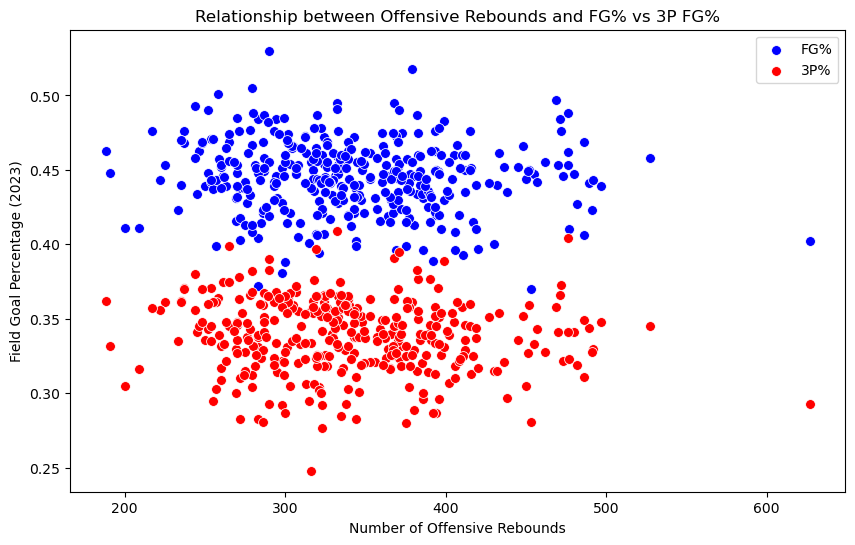

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=season_df_2023, x='OffReb2023', y='FGPct2023', color='blue', label='FG%', s=50)

sns.scatterplot(data=season_df_2023, x='OffReb2023', y='3PPct2023', color='red', label='3P%', s=50)

plt.xlabel("Number of Offensive Rebounds")
plt.ylabel("Field Goal Percentage (2023)")
plt.title("Relationship between Offensive Rebounds and FG% vs 3P FG%")

plt.legend()
plt.show()

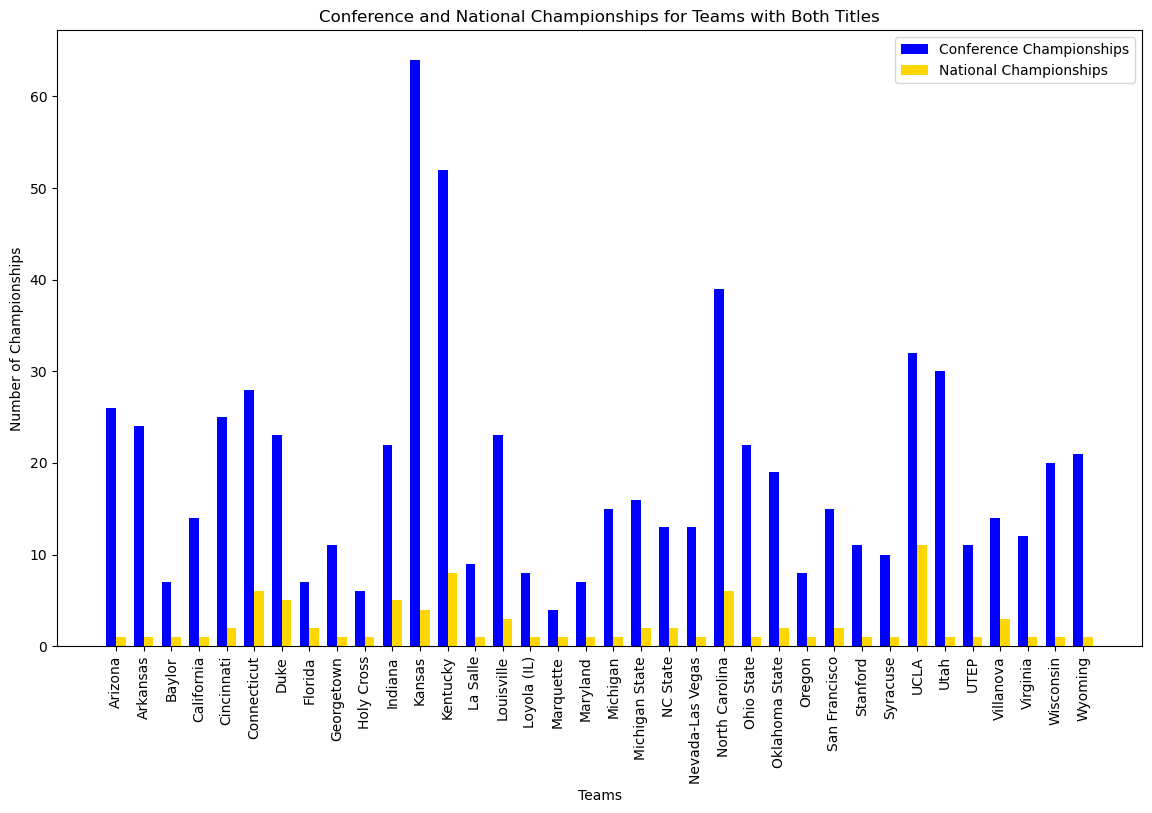

In [88]:
both_chips_df = complete_df[(complete_df['RegSeasonConfChampCount'] > 0) & (complete_df['NCAAChampCount'] > 0)]

teams = both_chips_df['School']
conference_champs = both_chips_df['RegSeasonConfChampCount']
national_champs = both_chips_df['NCAAChampCount']


bar_width = 0.35
index = np.arange(len(teams))

fig, ax = plt.subplots(figsize=(14, 8))

bar1 = ax.bar(index, conference_champs, bar_width, label='Conference Championships', color='blue')
bar2 = ax.bar(index + bar_width, national_champs, bar_width, label='National Championships', color='gold')


ax.set_xlabel('Teams')
ax.set_ylabel('Number of Championships')
ax.set_title('Conference and National Championships for Teams with Both Titles')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(teams, rotation=90)
ax.legend()

plt.show()
